In [2]:
import random

import numpy as np
from scipy.stats import norm

In [6]:
import matplotlib.pyplot as plt

In [3]:
# start random generator
random.seed(1)

In [4]:
#Brownian motion
"""
 Takes: The number of no of paths: no of diff stokes to get path
        The number of no of paths: time duration
        mu: % annual return 
        std: standerd divition for path
        init_p : stating value
        dt : time difference before next point
        
 Returns: all the paths 
 
"""

def brownian_sim(num_path, num_period, mu, std, init_p, dt):
    z = np.random.normal(size=(num_path, num_period))

    a_price = np.zeros((num_path, num_period))
    a_price[:, 0] = init_p

    for t in range(num_period - 1):
        a_price[:, t + 1] = a_price[:, t] * np.exp(
            (mu - (std ** 2) / 2) * dt + std * np.sqrt(dt) * z[:, t]
        )
    return a_price

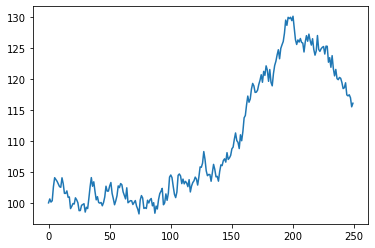

In [16]:
S1_path = brownian_sim(num_path= 1, num_period=250, mu=0.05, std=0.1, init_p = 100, dt=0.01)
S1_path[0]
plt.plot(S1_path[0])

In [18]:
# BSM Call Option Pricing Formula & BS Delta formula
'''
Takes: av : Annual Volatility
       T : time to maturity
       S : Stock path (which we would get from #brownian_sim function)
       K : Option Strike Price
       r : Annual Risk Free Rate
       q : Annual Dividend (which would be 0 as we are considering risk free)

Returns: 1) bs_price : option price paths (num_path x num_period)
         2) b_delta : delta (num_path x num_period)

'''

def bs_call(av, T, S, K, r, q):
    
    d1 = (np.log(S / K) + (r - q + iv * iv / 2) * T) / (iv * np.sqrt(T))
    d2 = d1 - iv * np.sqrt(T)
    
    bs_price = S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    
    bs_delta = np.exp(-q * T) * norm.cdf(d1)
    
    return bs_price, bs_delta

In [17]:
def get_sim_path(M, freq, np_seed, num_sim):
    """ Return simulated data: a tuple of three arrays
        M: initial time to maturity
        freq: trading freq in unit of day, e.g. freq=2: every 2 day; freq=0.5 twice a day;
        np_seed: numpy random seed
        num_sim: number of simulation path
        1) asset price paths (num_path x num_period)
        2) option price paths (num_path x num_period)
        3) delta (num_path x num_period)
    """
    # set the np random seed
    np.random.seed(np_seed)

    # Trading Freq per day; passed from function parameter
    # freq = 2

    # Annual Trading Day
    T = 250

    # Simulation Time Step
    dt = 0.004 * freq

    # Option Day to Maturity; passed from function parameter
    # M = 60

    # Number of period
    num_period = int(M / freq)

    # Number of simulations; passed from function parameter
    # num_sim = 1000000

    # Annual Return
    mu = 0.05
    
    # Annual Volatility
    vol = 0.2
    
    # Initial Asset Value
    S = 100

    # Option Strike Price
    K = 100

    # Annual Risk Free Rate
    r = 0

    # Annual Dividend
    q = 0

    # asset price 2-d array
    print("1. generate asset price paths")
    a_price = brownian_sim(num_sim, num_period + 1, mu, vol, S, dt)

    # time to maturity "rank 1" array: e.g. [M, M-1, ..., 0]
    ttm = np.arange(M, -freq, -freq)

    # BS price 2-d array and bs delta 2-d array
    print("2. generate BS price and delta")
    bs_price, bs_delta = bs_call(vol, ttm / T, a_price, K, r, q)

    print("simulation done!")

    return a_price, bs_price, bs_delta